In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plot
%matplotlib inline

In [2]:
df= pd.read_csv("Datasets/netflix_titles.csv")
df.shape

(8807, 12)

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df['director'].fillna('NA', inplace = True)

In [7]:
df['cast'].fillna('NA', inplace = True)
df.shape

(8807, 12)

In [8]:
df['country'].fillna(df['country'].mode()[0], inplace = True)

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [13]:
df['rating'] = df['rating'].replace({
                'PG-13': 'Teens',
                'TV-MA': 'Adults',
                'PG': 'Kids',
                'TV-14': 'Teens',
                'TV-PG': 'Kids',
                'TV-Y': 'Kids',
                'TV-Y7': 'Kids',
                'R': 'Adults',
                'TV-G': 'Kids',
                'G': 'Kids',
                'NC-17': 'Adults',
                'NR': 'Adults',
                'UR' : 'Adults',
                'TV-Y7-FV': 'Kids'
                
})

In [14]:
df.isnull().sum()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NA,NA,United States,"September 24, 2021",2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,Adults,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NA,NA,United States,"July 1, 2019",2018,Kids,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,Adults,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,Kids,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [15]:
df['date_added_month'] = df['date_added'].str.split(' ',expand  = True)[0]

In [16]:
df['date_added_year']=df['date_added'].str.split(' ',expand  = True)[2]

In [17]:
df['date_added_year'].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2009', '2008', '4,', '23,', '15,', '1,',
       '26,', '2,', '28,', '31,', '24,', '14,', '20,', '17,', '7,', '21,',
       '8,', '16,', '3,', '22,', '2010', '12,', '13,', '18,', '19,',
       '11,', '30,', '5,', '25,'], dtype=object)

In [18]:
df['date_added'] = pd.to_datetime(df['date_added'],format = 'mixed')


ValueError: time data 'September 25, 2021' does not match format 'mixed' (match)

In [ ]:
df['date_added'] = df['date_added'].replace(',','')

In [19]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,NA,NA,United States,"September 24, 2021",2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,Adults,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,2019
8803,s8804,TV Show,Zombie Dumb,NA,NA,United States,"July 1, 2019",2018,Kids,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,Adults,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,Kids,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020


In [20]:
# df['date_added_year']=df['date_added'].str.split(' ',expand =True)
df['date_added'].str.split(' ',expand =True)

,0,1,2,3
0,September,"25,",2021,None
1,September,"24,",2021,None
2,September,"24,",2021,None
3,September,"24,",2021,None
4,September,"24,",2021,None
...,...,...,...,...
8802,November,"20,",2019,None
8803,July,"1,",2019,None
8804,November,"1,",2019,None
8805,January,"11,",2020,None


In [21]:
df['date_added_month'] = df['date_added_month'].str.split(' ',expand =True)[0]

In [22]:
df['date_added_month'].unique()

array(['September', 'August', 'July', 'June', 'May', 'April', 'March',
       'February', 'January', 'December', 'November', 'October', ''],
      dtype=object)

In [23]:
df['date_added_year'].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2009', '2008', '4,', '23,', '15,', '1,',
       '26,', '2,', '28,', '31,', '24,', '14,', '20,', '17,', '7,', '21,',
       '8,', '16,', '3,', '22,', '2010', '12,', '13,', '18,', '19,',
       '11,', '30,', '5,', '25,'], dtype=object)

In [24]:
df['date_added_year'].value_counts()

2019    1999
2020    1878
2018    1624
2021    1498
2017    1161
2016     415
2015      73
1,        33
2014      23
2011      13
2013      10
15,        6
31,        6
4,         4
20,        4
28,        3
2012       3
16,        3
8,         3
2008       2
2009       2
18,        2
22,        2
3,         2
17,        2
13,        2
14,        2
26,        2
12,        2
11,        1
19,        1
30,        1
5,         1
21,        1
2010       1
23,        1
7,         1
24,        1
2,         1
25,        1
Name: date_added_year, dtype: int64

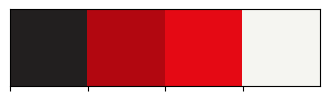

In [25]:
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])


In [26]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,NA,NA,United States,"September 24, 2021",2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,Adults,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,2019
8803,s8804,TV Show,Zombie Dumb,NA,NA,United States,"July 1, 2019",2018,Kids,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,Adults,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,Kids,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020


In [27]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [28]:
df_type =df.groupby('type')['show_id'].count().reset_index()
df_type = df_type.rename(columns = {'show_id':'count_type'})

In [29]:
df_type

,type,count_type
0,Movie,6126
1,TV Show,2664


In [30]:
df_type['count_percentage'] = df_type['count_type'] / df_type['count_type'].sum() *100

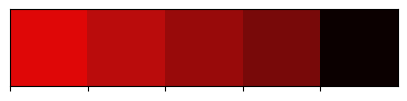

In [31]:
netflix_color_palette = ['#df0707',	'#ba0c0c','#980a0a','#780909','#0b0000']
sns.palplot(netflix_color_palette)

<Axes: xlabel='count_type', ylabel='type'>

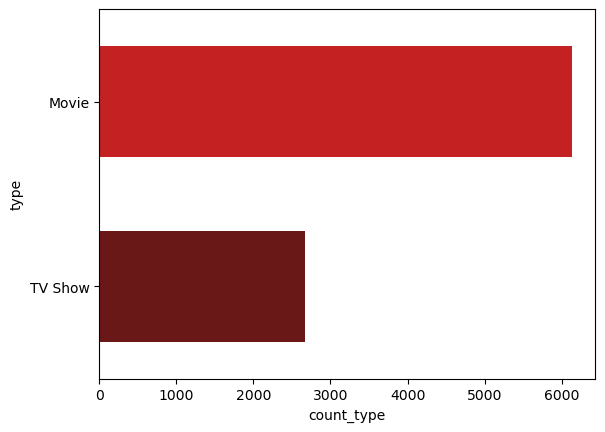

In [32]:
sns.barplot(x = df_type['count_type'] , y = df_type['type'],orient='h',width=0.6,palette=[netflix_color_palette[0],netflix_color_palette[3]])

In [33]:
df_country

NameError: name 'df_country' is not defined

In [34]:
df_country = df['country'].value_counts()[:10]

In [35]:
# df_country.rename(columns = 'Country','Count'])

In [37]:
# df_country.columns = ['Country','Count'].reset_index()

In [38]:
df.groupby('country')['show_id'].count().reset_index()

,country,show_id
0,", France, Algeria",1
1,", South Korea",1
2,Argentina,56
3,"Argentina, Brazil, France, Poland, Germany, De...",1
4,"Argentina, Chile",2
...,...,...
743,Venezuela,1
744,"Venezuela, Colombia",1
745,Vietnam,7
746,West Germany,1


<Axes: >

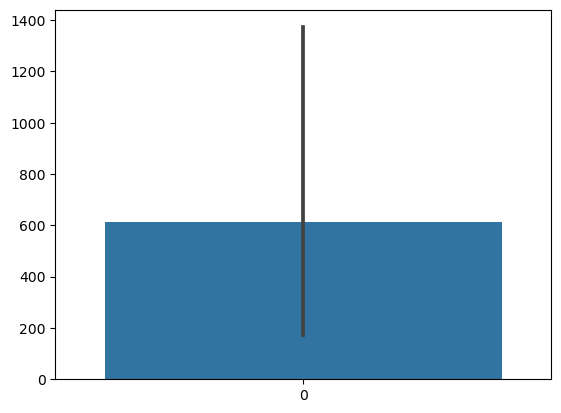

In [39]:
sns.barplot(df_country)

In [40]:
df_country.reset_index(inplace = True)

TypeError: Cannot reset_index inplace on a Series to create a DataFrame

In [ ]:
df_country.columns = ['Country','Count']

In [42]:
plt.figure(figsize=(5,6))
plt.text(x=6,y=3000,s='We can observe that the US makes\n most of  the Netflix Movies')
sns.barplot(x = df_country['Country'], y = df_country['Count'],color = netflix_color_palette[1])

KeyError: 'Country'

ValueError: Image size of 2620x1386070 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 500x600 with 1 Axes>

In [202]:
df_year = df['release_year'].value_counts()[:10]

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (1980814137.py, line 1)

In [43]:
df_year=pd.DataFrame(df_year)

NameError: name 'df_year' is not defined

In [204]:
df_year.reset_index(inplace=True)

In [205]:
df_year

,index,release_year
0,2018,1146
1,2017,1030
2,2019,1030
3,2020,953
4,2016,901
5,2021,592
6,2015,555
7,2014,352
8,2013,286
9,2012,236


In [206]:
df_year.columns = ['release_year','count']

In [207]:
df_year

,release_year,count
0,2018,1146
1,2017,1030
2,2019,1030
3,2020,953
4,2016,901
5,2021,592
6,2015,555
7,2014,352
8,2013,286
9,2012,236


<Axes: xlabel='release_year', ylabel='count'>

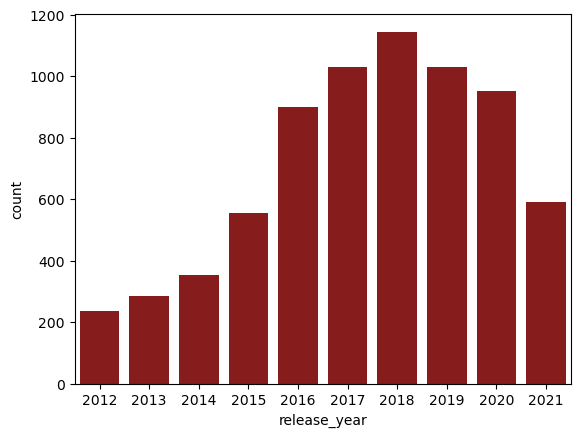

In [213]:
sns.barplot(x = df_year['release_year'],y= df_year['count'],color  = netflix_color_palette[2])

([<matplotlib.patches.Wedge at 0x1cb1071eb60>,
 [Text(-0.6379461266276708, 0.8961164765368127, 'Movies'),
  Text(0.6379461266276707, -0.8961164765368128, 'TV Shows')],
 [Text(-0.34797061452418404, 0.48879080538371594, '69.7%'),
  Text(0.347970614524184, -0.488790805383716, '30.3%')])

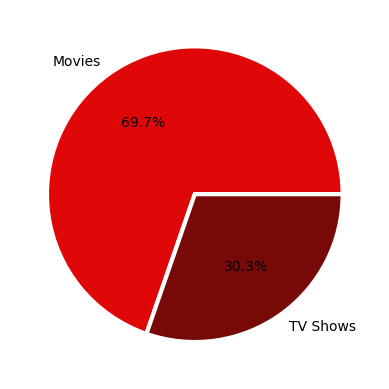

In [232]:
plt.pie(x = df_type['count_type'],data = df_type,labels=['Movies','TV Shows'],colors=[netflix_color_palette[0],netflix_color_palette[3]],autopct='%.1f%%',wedgeprops={'linewidth':3,'edgecolor': 'white'})

In [233]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,NA,NA,United States,"September 24, 2021",2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,Adults,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,2019
8803,s8804,TV Show,Zombie Dumb,NA,NA,United States,"July 1, 2019",2018,Kids,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,Adults,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,Kids,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020


<Axes: xlabel='release_year', ylabel='count'>

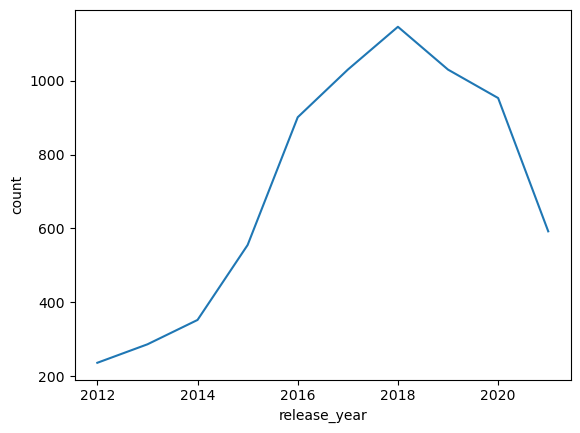

In [235]:
sns.lineplot(x=df_year['release_year'],y = df_year['count'])

In [236]:
df_year

,release_year,count
0,2018,1146
1,2017,1030
2,2019,1030
3,2020,953
4,2016,901
5,2021,592
6,2015,555
7,2014,352
8,2013,286
9,2012,236
